<a href="https://colab.research.google.com/github/debgit/Deep-Learning/blob/master/S13/YoloV3Skipper.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/debgit/YoloV30

remote: Total 1041 (delta 1), reused 0 (delta 0), pack-reused 971
Receiving objects: 100% (1041/1041), 103.78 MiB | 11.28 MiB/s, done.
Resolving deltas: 100% (60/60), done.
fatal: destination path 'YoloV30' already exists and is not an empty directory.


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [4]:
import time
import glob
import torch
import os

from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.4.0 _CudaDeviceProperties(name='Tesla P4', major=6, minor=1, total_memory=7611MB, multi_processor_count=20)


In [5]:
ls

gdrive/  sample_data/  YoloV30/


In [11]:
cd YoloV30/

/content/YoloV30


In [12]:
!ls

 annotation_tool   output	  test		     train.py
 cfg		   README.md	  test_batch0.png   'ubdivisions=1'
 data		   results.json   test.py	     utils
 detect.py	   results.png	  ting		     vim.exe.stackdump
 models.py	   results.txt	  train_batch0.png   weights


In [13]:
!python train.py --data data/smalcoco/smalcoco.data --batch 3 --cache --epochs 3 --nosave
#!python train.py --data data/smalcoco/smalcoco.data --batch 10 --cache --epochs 25 --nosave


Namespace(accumulate=4, adam=False, batch_size=3, bucket='', cache_images=True, cfg='cfg/yolov3-spp.cfg', data='data/smalcoco/smalcoco.data', device='', epochs=3, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P4', total_memory=7611MB)

2020-04-23 17:36:30.233161: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.29987e+07 parameters, 6.29987e+07 gradients
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   408    0   408    0     0   1232      0 --:--:-- --:--:-- --:--:--  1228
  0     0    0     0    0     0      0      0 --:

In [14]:
!python train.py --data data/customdata/custom.data --batch 10 --cache --cfg cfg/yolov3-custom.cfg --epochs 30 --nosave

Namespace(accumulate=4, adam=False, batch_size=10, bucket='', cache_images=True, cfg='cfg/yolov3-custom.cfg', data='data/customdata/custom.data', device='', epochs=30, evolve=False, img_size=[512], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=False, single_cls=False, weights='weights/yolov3-spp-ultralytics.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P4', total_memory=7611MB)

2020-04-23 17:37:23.563667: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
Run 'tensorboard --logdir=runs' to view tensorboard at http://localhost:6006/
Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
Caching labels (450 found, 0 missing, 0 empty, 0 duplicate, for 450 images): 100% 450/450 [00:00<00:00, 9816.19it/s]
Caching images (0.1GB):  25% 114/450 [00:00<00:02, 155.22it/s]libpng warning: iCCP: known incorrect sRGB profile
libpng warning: iCCP: known incorrect sRGB profile


In [15]:
!python detect.py --conf-thres 0.1 --output out_out

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='out_out', save_txt=False, source='data/customdata/images', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P4', total_memory=7611MB)

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
image 1/500 data/customdata/images/img1.JPG: 448x512 1 skippers, Done. (0.037s)
image 2/500 data/customdata/images/img10.JPG: 512x512 1 skippers, Done. (0.039s)
image 3/500 data/customdata/images/img100.JPG: 384x512 1 skippers, Done. (0.033s)
image 4/500 data/customdata/images/img101.JPG: 384x512 1 skippers, Done. (0.031s)
image 5/500 data/customdata/images/img102.JPG: 384x512 1 skippers, Done. (0.031s)
image 6/500 data/customdata/images/img103.JPG: 384x512 1 skippers, Done. (0.031s)
image 7/500 data/customdata/images/img1

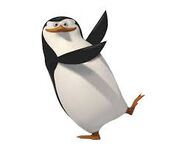

In [16]:
Image(filename='./output/img1.JPG', width=600)

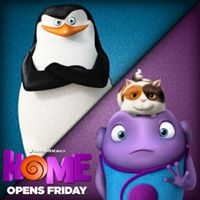

In [17]:
Image(filename='./output/img2.JPG', width=600)

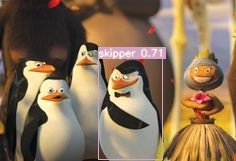

In [18]:
Image(filename='out_out/img3.JPG', width=600)

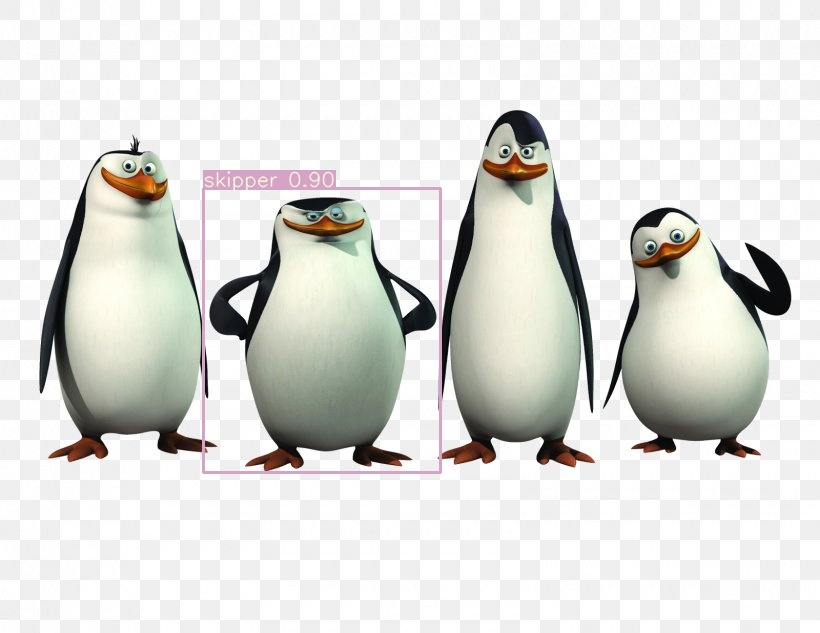

In [19]:
Image(filename='out_out/img4.JPG', width=600)

In [0]:
#!python detect.py --conf-thres 0.1 --output "/content/gdrive/My Drive/yolo_v3/output_vid" --source "/content/gdrive/My Drive/yolo_v3/DJI - Introducing Spark.mp4"

In [21]:
!python detect.py --conf-thres 0.1 --output "/content/gdrive/My Drive/EVA4/S13/yolo_v31" --source "/content/gdrive/My Drive/EVA4/S13/vid3.mp4"

Streaming output truncated to the last 5000 lines.
video 1/1 (363/5359) /content/gdrive/My Drive/EVA4/S13/vid3.mp4: 320x512 Done. (0.026s)
video 1/1 (364/5359) /content/gdrive/My Drive/EVA4/S13/vid3.mp4: 320x512 Done. (0.026s)
video 1/1 (365/5359) /content/gdrive/My Drive/EVA4/S13/vid3.mp4: 320x512 Done. (0.026s)
video 1/1 (366/5359) /content/gdrive/My Drive/EVA4/S13/vid3.mp4: 320x512 Done. (0.026s)
video 1/1 (367/5359) /content/gdrive/My Drive/EVA4/S13/vid3.mp4: 320x512 Done. (0.026s)
video 1/1 (368/5359) /content/gdrive/My Drive/EVA4/S13/vid3.mp4: 320x512 2 skippers, Done. (0.026s)
video 1/1 (369/5359) /content/gdrive/My Drive/EVA4/S13/vid3.mp4: 320x512 2 skippers, Done. (0.026s)
video 1/1 (370/5359) /content/gdrive/My Drive/EVA4/S13/vid3.mp4: 320x512 2 skippers, Done. (0.026s)
video 1/1 (371/5359) /content/gdrive/My Drive/EVA4/S13/vid3.mp4: 320x512 2 skippers, Done. (0.026s)
video 1/1 (372/5359) /content/gdrive/My Drive/EVA4/S13/vid3.mp4: 320x512 1 skippers, Done. (0.026s)
video 1/1

In [22]:
!python detect.py --conf-thres 0.1 --output "/content/gdrive/My Drive/EVA4/S13/yolo_v32" --source "/content/gdrive/My Drive/EVA4/S13/vid2.mp4"

Streaming output truncated to the last 5000 lines.
video 1/1 (2500/7496) /content/gdrive/My Drive/EVA4/S13/vid2.mp4: 320x512 Done. (0.026s)
video 1/1 (2501/7496) /content/gdrive/My Drive/EVA4/S13/vid2.mp4: 320x512 Done. (0.026s)
video 1/1 (2502/7496) /content/gdrive/My Drive/EVA4/S13/vid2.mp4: 320x512 Done. (0.026s)
video 1/1 (2503/7496) /content/gdrive/My Drive/EVA4/S13/vid2.mp4: 320x512 Done. (0.026s)
video 1/1 (2504/7496) /content/gdrive/My Drive/EVA4/S13/vid2.mp4: 320x512 Done. (0.026s)
video 1/1 (2505/7496) /content/gdrive/My Drive/EVA4/S13/vid2.mp4: 320x512 Done. (0.026s)
video 1/1 (2506/7496) /content/gdrive/My Drive/EVA4/S13/vid2.mp4: 320x512 Done. (0.026s)
video 1/1 (2507/7496) /content/gdrive/My Drive/EVA4/S13/vid2.mp4: 320x512 Done. (0.026s)
video 1/1 (2508/7496) /content/gdrive/My Drive/EVA4/S13/vid2.mp4: 320x512 Done. (0.026s)
video 1/1 (2509/7496) /content/gdrive/My Drive/EVA4/S13/vid2.mp4: 320x512 Done. (0.026s)
video 1/1 (2510/7496) /content/gdrive/My Drive/EVA4/S13/vid

In [23]:
!python detect.py --conf-thres 0.1 --output "/content/gdrive/My Drive/EVA4/S13/yolo_v33" --source "/content/gdrive/My Drive/EVA4/S13/vid4.mp4"

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3-custom.cfg', classes=None, conf_thres=0.1, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/customdata/custom.names', output='/content/gdrive/My Drive/EVA4/S13/yolo_v33', save_txt=False, source='/content/gdrive/My Drive/EVA4/S13/vid4.mp4', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla P4', total_memory=7611MB)

Model Summary: 225 layers, 6.25733e+07 parameters, 6.25733e+07 gradients
video 1/1 (1/1243) /content/gdrive/My Drive/EVA4/S13/vid4.mp4: 320x512 Done. (0.031s)
video 1/1 (2/1243) /content/gdrive/My Drive/EVA4/S13/vid4.mp4: 320x512 Done. (0.029s)
video 1/1 (3/1243) /content/gdrive/My Drive/EVA4/S13/vid4.mp4: 320x512 Done. (0.029s)
video 1/1 (4/1243) /content/gdrive/My Drive/EVA4/S13/vid4.mp4: 320x512 Done. (0.028s)
video 1/1 (5/1243) /content/gdrive/My Drive/EVA4/S13/vid4.mp4: 320x512 Done. (0.028s)
video 1/1 (6/1243) /content/gdrive/My Drive